In [1]:
#Packages
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable

In [2]:
#Import data
data = pd.read_excel(r"C:\Users\joc_h\CLCDMX\Data\PenaDelAire.xlsx")

#Date format
data["Date"] = pd.to_datetime(data["Date"])

In [3]:
#Hourly averages
data.set_index('Date', inplace=True)
promedio = data.groupby(pd.Grouper(freq="h")).mean()
promedio_reset = promedio.reset_index()

In [5]:
# Subset data
subset = promedio_reset[(promedio_reset["Date"].dt.year == 2023) & (promedio_reset["Date"].dt.month == 12)]

In [6]:
# Extract hour, day, and MAS
hour = subset["Date"].dt.hour
day = subset["Date"].dt.day
MAS = subset["MAS"]

In [7]:
#Create matrix [hours x days]
MAS = MAS.values.reshape(24, len(day.unique()), order="F")

In [8]:
#Late MAS
MAS_late = MAS[19:24]

In [9]:
#min and max late MAS 
MIN_MAS_late = np.min(MAS_late)
MAX_MAS_late = np.max(MAS_late)

In [10]:
MAX_MAS_late

nan

In [1405]:
#Early MAS
MAS_early = MAS[0:6]

In [1407]:
#min and max early MAS 
MIN_MAS_early = np.min(MAS_early)
MAX_MAS_early = np.max(MAS_early)

In [1409]:
#X mesh (days)
xgrid = np.arange(day.max() + 1) + 1

In [1411]:
#Y mesh (late hours)
ygrid = np.arange(len(MAS_late)+1)

In [1413]:
#Y mesh (early hours)
ygride = np.arange(len(MAS_early)+1)

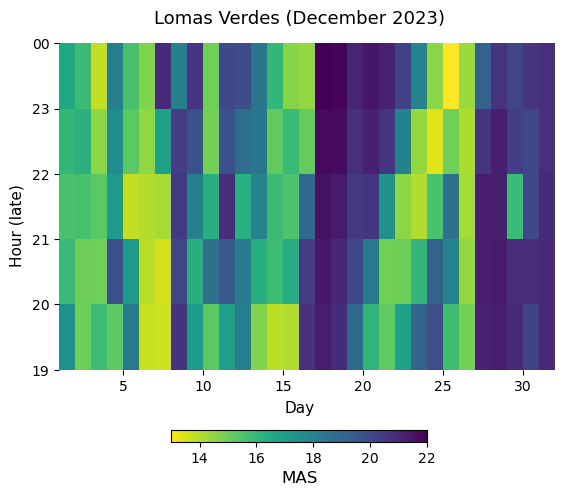

In [1415]:
#late mesh
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygrid, MAS_late, cmap='viridis_r')
ax.set_frame_on(False)


new_labels = ["19", "20", "21", "22", "23", "00"]
plt.yticks(ygrid, new_labels)

plt.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
norm = mc.Normalize(13, 22)

cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="viridis_r"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Set legend label
cb.set_label("MAS", size=12)

fig.text(0.5, 0.12, "Day", ha="center", va="center", fontsize=11)
fig.text(0.06, 0.5, 'Hour (late)', ha="center", va="center", rotation="vertical", fontsize=11)
fig.suptitle("Lomas Verdes (December 2023)", fontsize=13, y=0.95)

plt.savefig("Lomas Verdes_late.png")

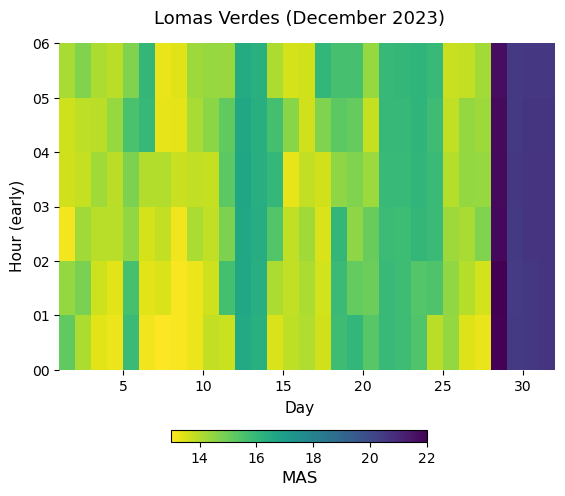

In [1247]:
#Early mesh
fig, ax = plt.subplots()
ax.pcolormesh(xgrid, ygride, MAS_early, cmap='viridis_r')
ax.set_frame_on(False)


new_labels = ["00", "01", "02", "03", "04", "05","06"]
plt.yticks(ygride, new_labels)

plt.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.025])
norm = mc.Normalize(13, 22)

cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap="viridis_r"), 
    cax=cbar_ax, # Pass the new axis
    orientation = "horizontal"
)

# Set legend label
cb.set_label("MAS", size=12)

fig.text(0.5, 0.12, "Day", ha="center", va="center", fontsize=11)
fig.text(0.06, 0.5, 'Hour (early)', ha="center", va="center", rotation="vertical", fontsize=11)
fig.suptitle("Lomas Verdes (December 2023)", fontsize=13, y=0.95)

plt.savefig("Lomas Verdes_early.png")